In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
df = pd.read_csv("coordinates.csv")

In [3]:
df

x        y  frame
0          20.569  261.640      1
1          19.809  497.740      1
2          20.428  640.130      1
3          20.737  674.450      1
4          21.288  348.970      1
...           ...      ...    ...
4072819  1259.200  956.490   1000
4072820  1260.300   95.926   1000
4072821  1259.800  207.150   1000
4072822  1260.000  379.490   1000
4072823  1260.400  509.110   1000

[4072824 rows x 3 columns]

In [4]:
frame1 = df[df['frame']==10]

In [5]:
frame1

x       y  frame
36774    20.835  384.89     10
36775    21.800  141.47     10
36776    21.618  242.55     10
36777    21.729  287.68     10
36778    21.387  752.06     10
...         ...     ...    ...
40848  1260.400  272.06     10
40849  1260.000  344.25     10
40850  1259.500  405.37     10
40851  1260.500  861.67     10
40852  1259.600  977.47     10

[4079 rows x 3 columns]

In [6]:
frame1 = df[df['frame']==1]
frame1x = np.array(frame1['x'])
frame1y = np.array(frame1['y'])

In [7]:
def carttopolar(x,y):
    r = np.sqrt(x**2 + y**2)
    t = np.arctan2(y,x)
    return r,t
def shiftorigin(x,y,xoff,yoff):
    x1 = x - xoff
    y1 = y - yoff
    return x1,y1

In [8]:
midx = (max(frame1x) + min(frame1x))/2
midy = (max(frame1y) + min(frame1y))/2

midx, midy

(np.float64(639.8045), np.float64(512.1854999999999))

In [9]:
s1x,s1y = shiftorigin(frame1x, frame1y, midx,midy)

In [10]:
r,t = carttopolar(s1x,s1y)
t

array([-2.75712315, -3.11829751,  2.937888  , ...,  0.31141429,
        0.56664372,  0.61602947])

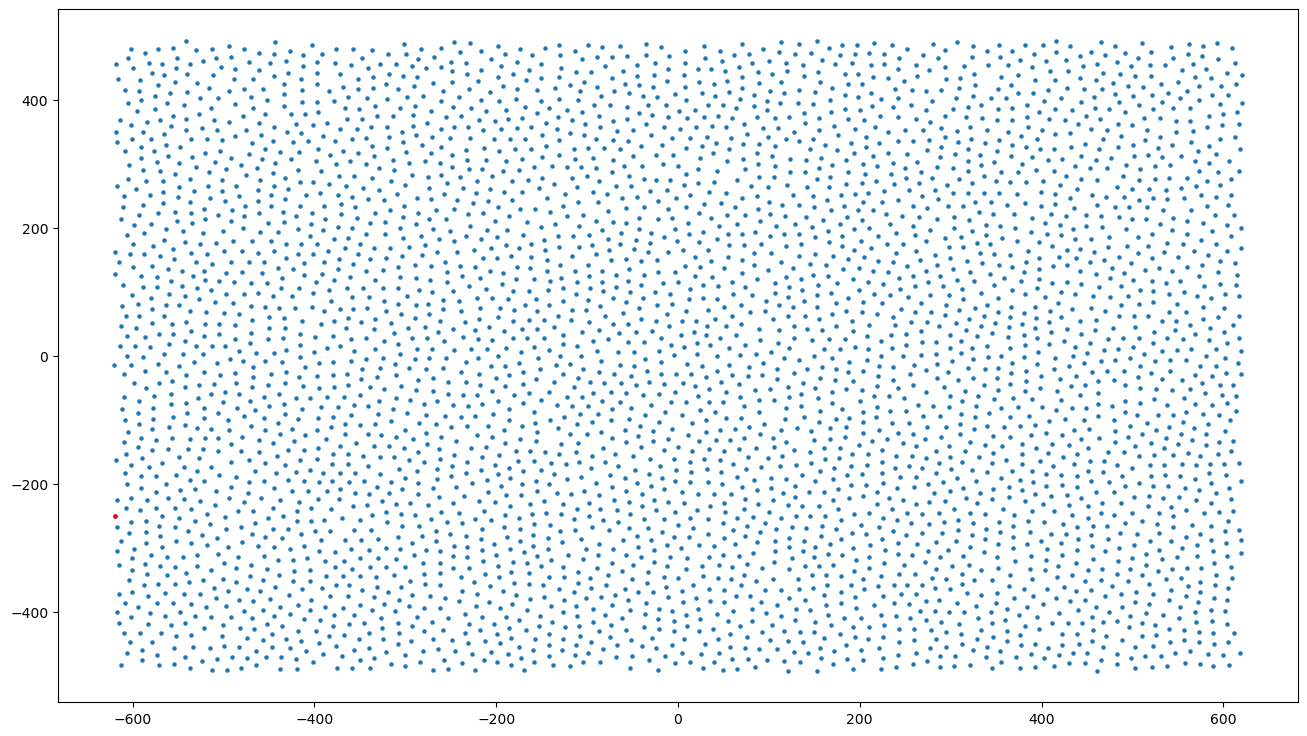

In [11]:
fig, axes= plt.subplots(1,1,figsize=(16,9))
axes.scatter(s1x,s1y,s=5)
# axes.scatter(frame1x,frame1y,s=5)
axes.scatter(s1x[0],s1y[0],s=5,color ='r')


In [12]:
dx = 1
cut =max(s1y)

(np.float64(668.0012365486309), np.float64(-2.757123151300457))

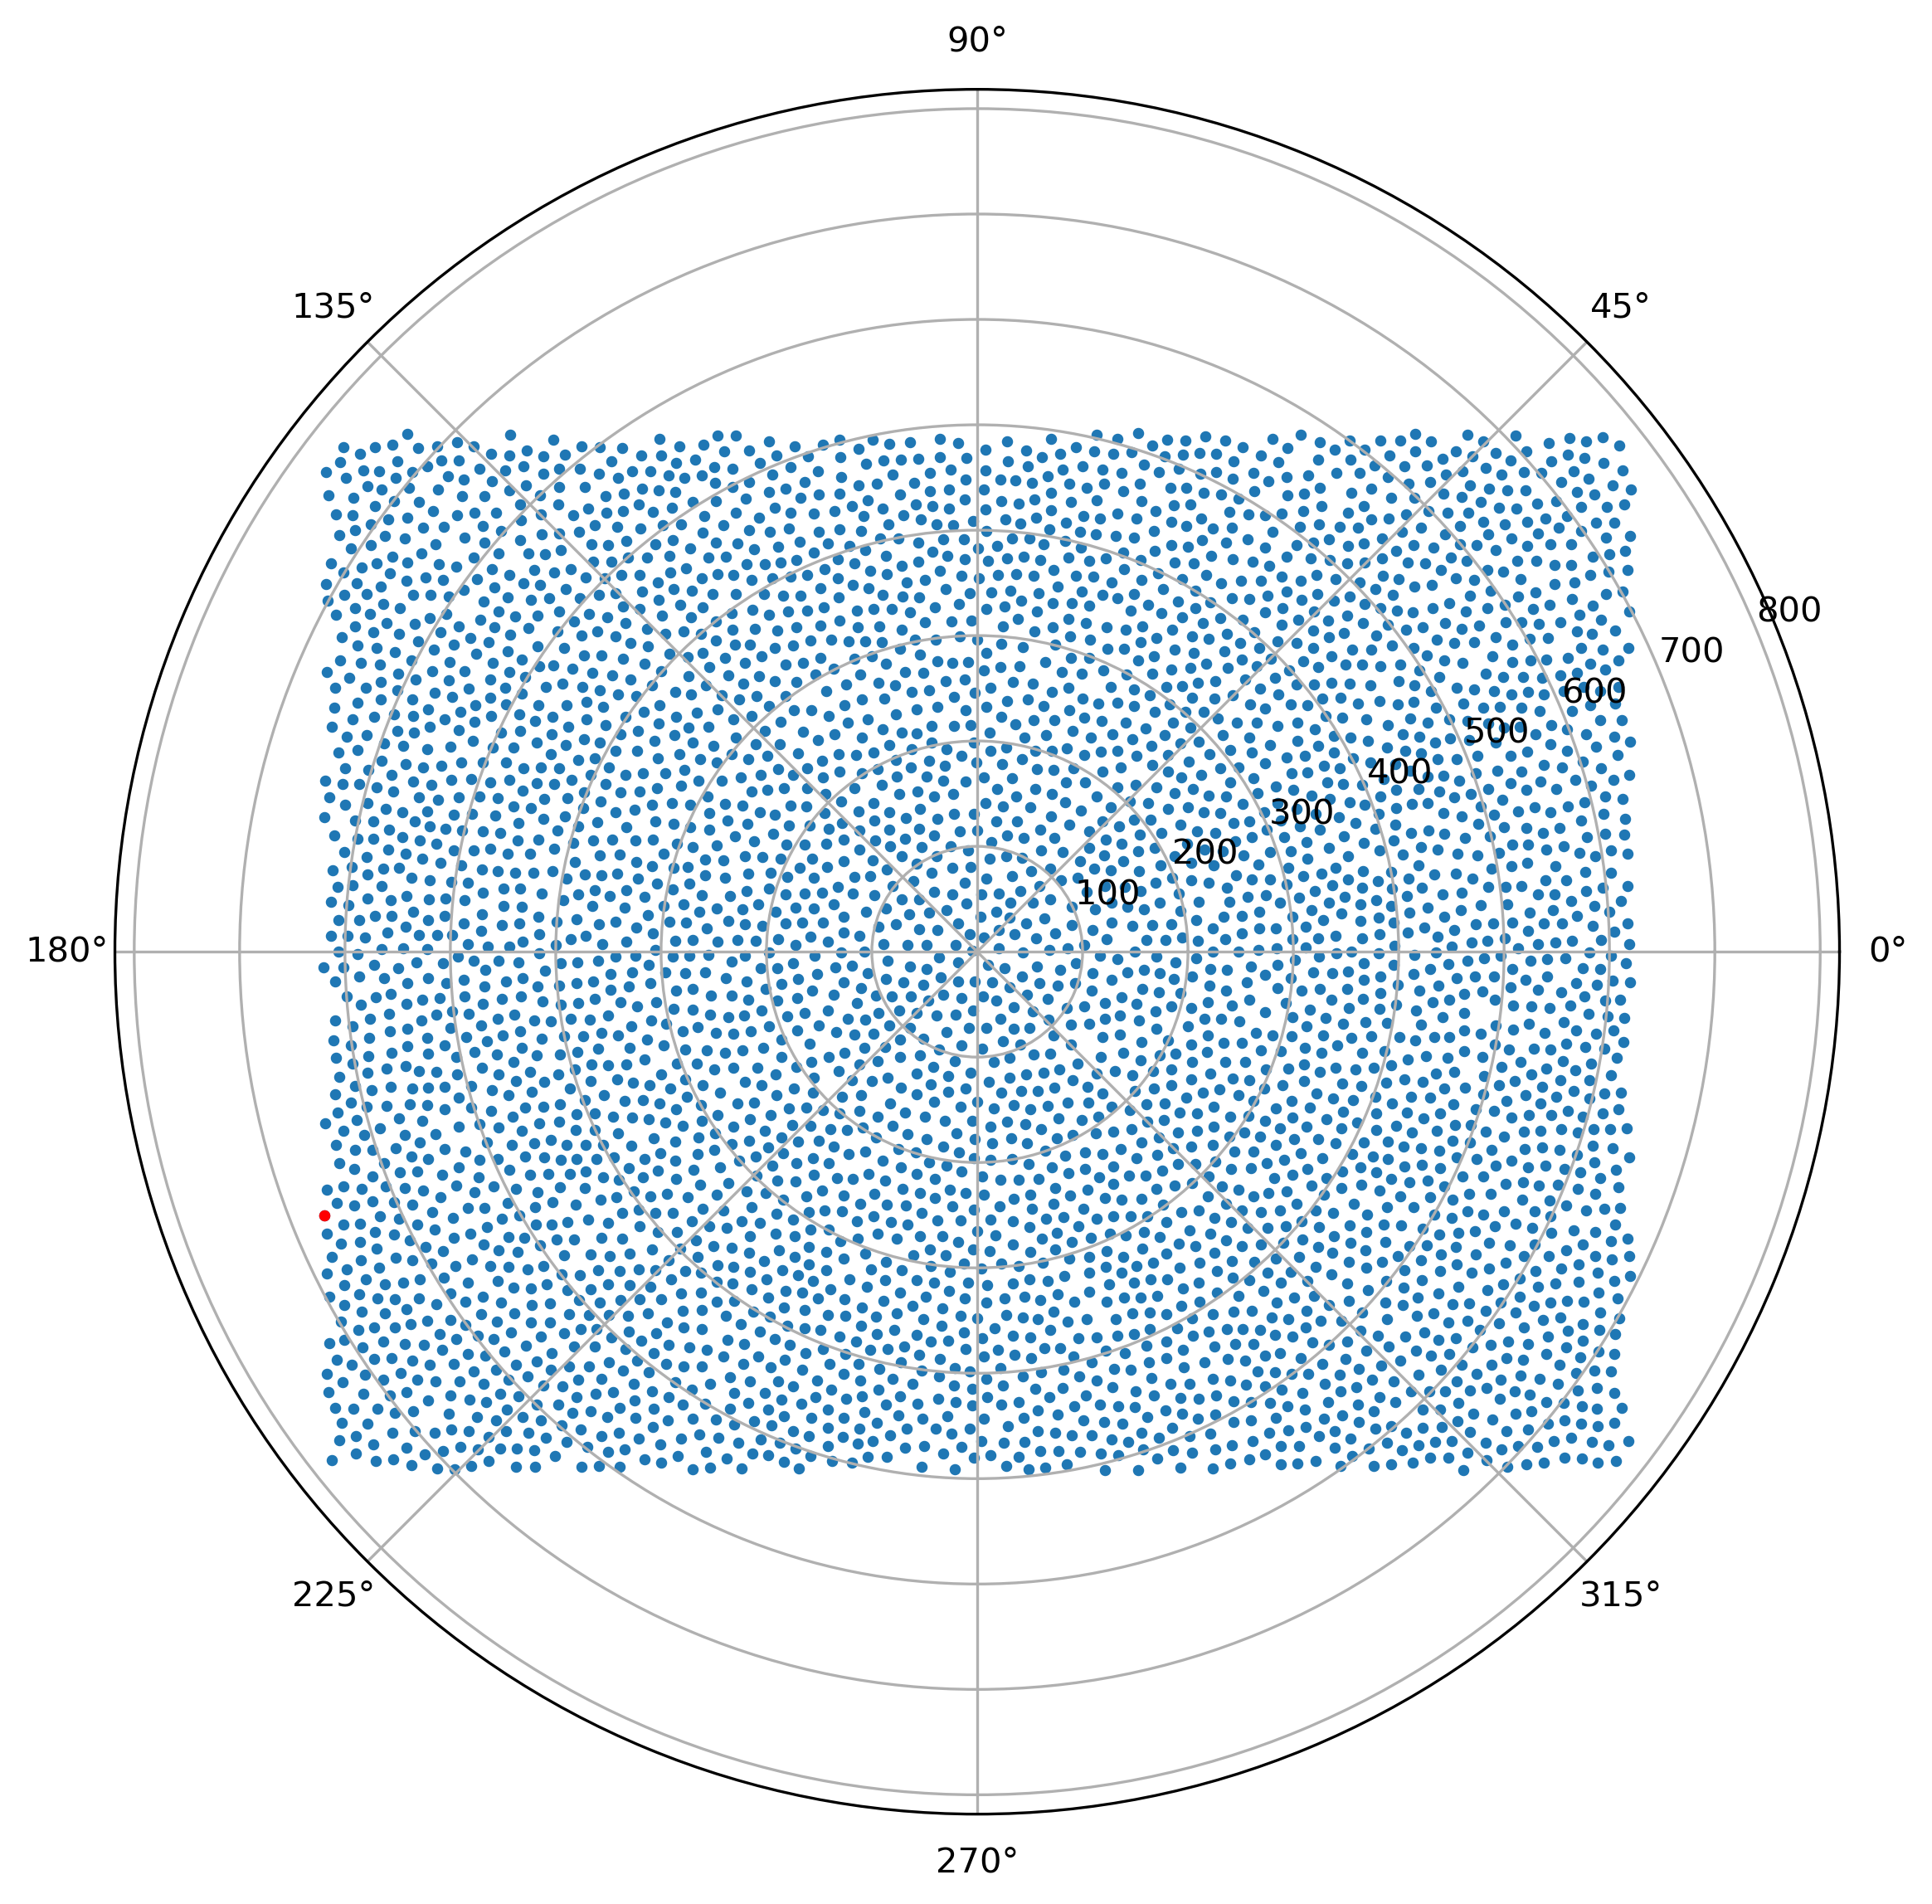

In [13]:
fig = plt.figure(figsize=(16,9), dpi=300) 
axes= fig.add_subplot(projection = 'polar')
axes.scatter(t,r,s=5)
axes.scatter(t[0],r[0],s=5,color ='r')
r[0],t[0]


In [22]:
r1 = []
t1 = []
indices = []
for i in range(0,len(r)):
    if r[i]< cut - dx:
        indices.append(i)
        r1.append(r[i])
        t1.append(t[i])
N1 = len(r1)
V = 2 * np.pi * np.max(r)**2
rho = N1/V

(np.float64(487.9646713958911), np.float64(3.086880049542702))

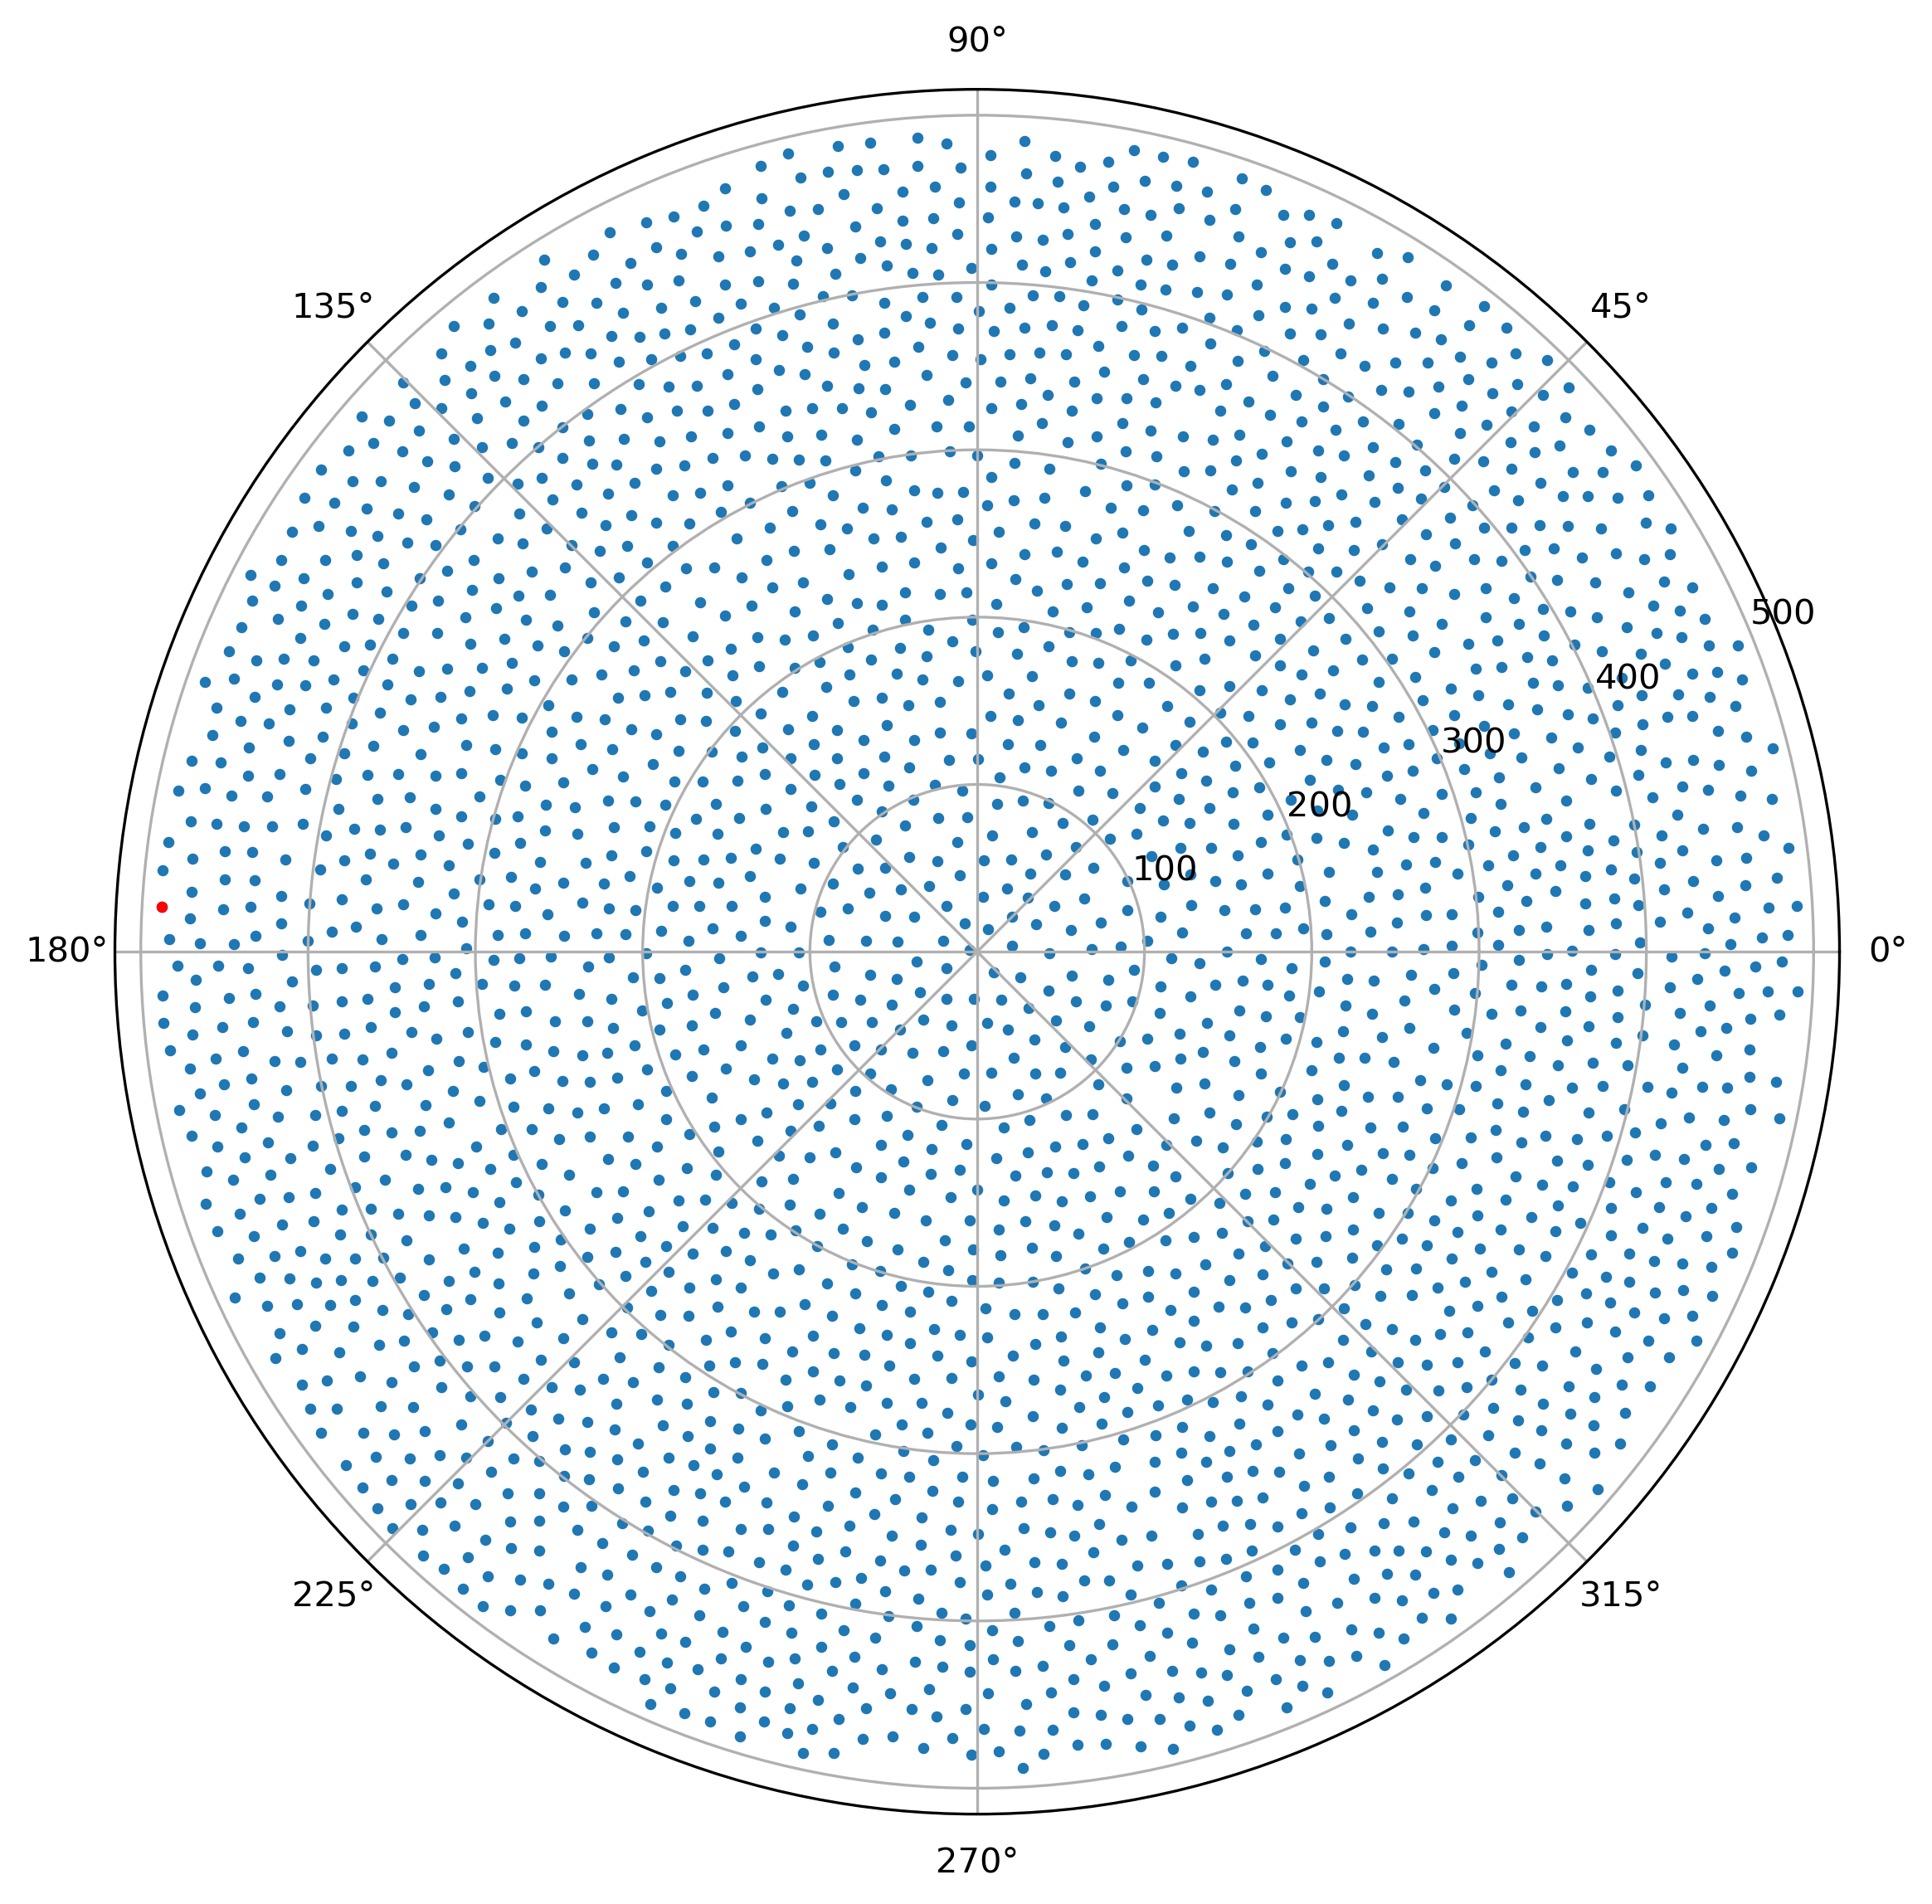

In [15]:
fig = plt.figure(figsize=(16,9), dpi=300) 
axes= fig.add_subplot(projection = 'polar')
axes.scatter(t1,r1,s=5)
axes.scatter(t1[0],r1[0],s=5,color ='r')
r1[0],t1[0]


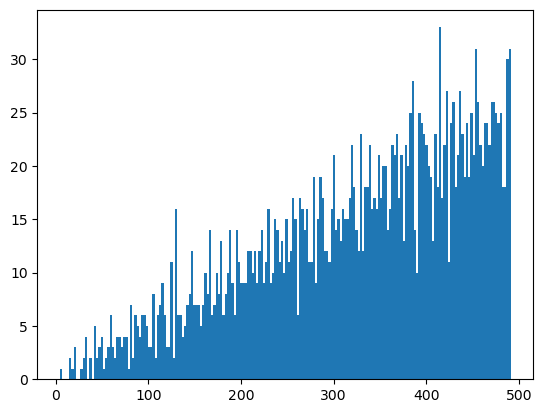

In [16]:
r1 = np.array(r1)
gr = r1/(4*np.pi*r1**2)
plt.hist(r1,bins=200);
# plt.xlim(0,0.001)

(-10.0, 10.0)

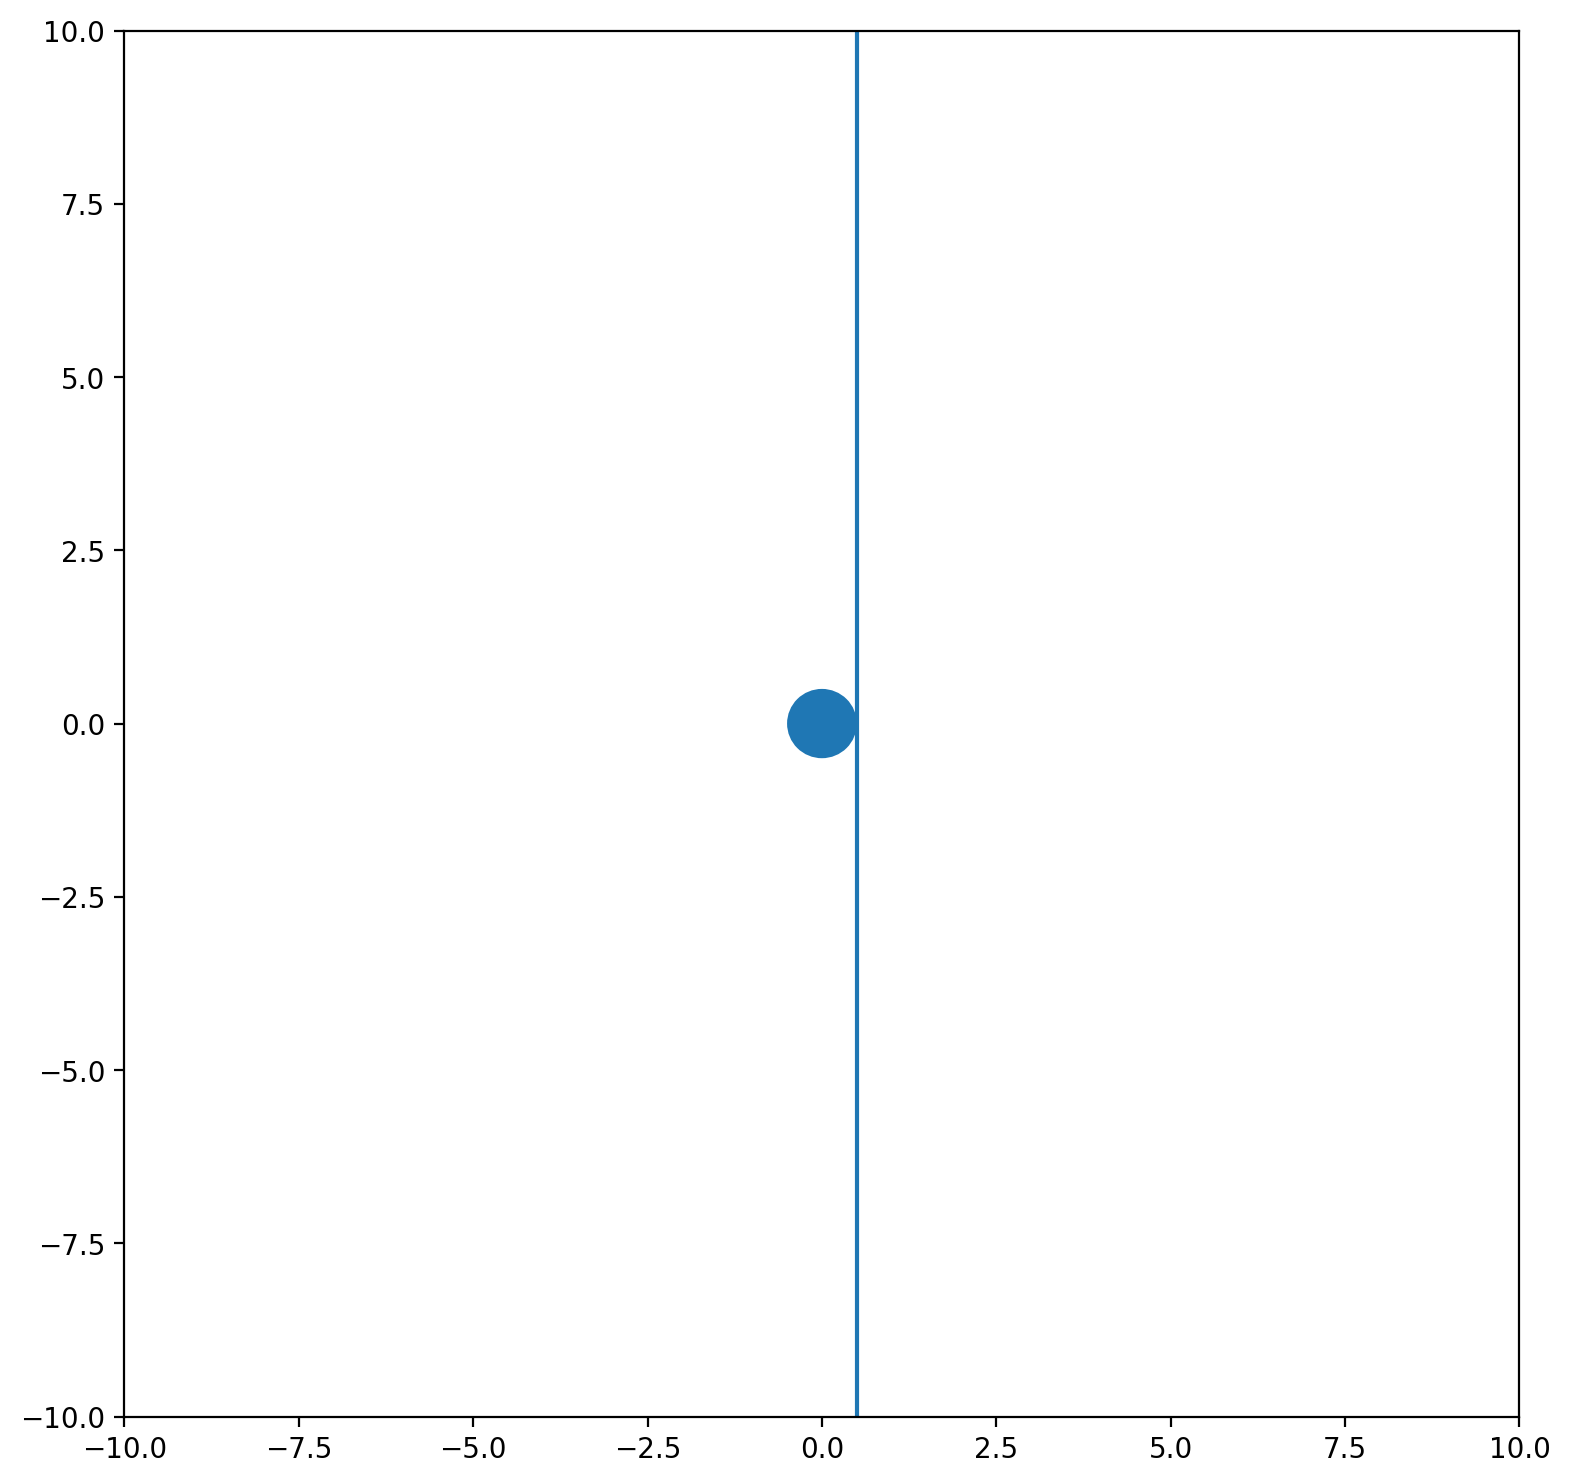

In [17]:
mar = [1,1]
fig,ax = plt.subplots(1,1,figsize=(9,9),dpi=200)
# ax.scatter(0,0, s=1000)
circ = mpl.patches.Circle((0,0),0.5,transform = ax.transData)
ax.add_patch(circ)
ax.set_xlim(-10,10)
ax.axvline(0.5)
dispcor = ax.transData
datacor = ax.transData.inverted()
ax.set_ylim(-10,10)


In [18]:
dispcor.transform([0,0])

array([922.5, 891. ])

In [19]:
datacor.transform([922.5+np.sqrt(1000),891.+np.sqrt(1000)])

array([0.45337314, 0.52281586])

In [20]:
radius = 0.1
# C/ = np.zeros(len(r1))
C = []
for i in range(0,len(r1)):
    C.append(mpl.patches.Circle((t1[i],r1[i]),radius,transform = axes.transData))
C1 = np.asarray(C)

(np.float64(487.9646713958911), np.float64(3.086880049542702))

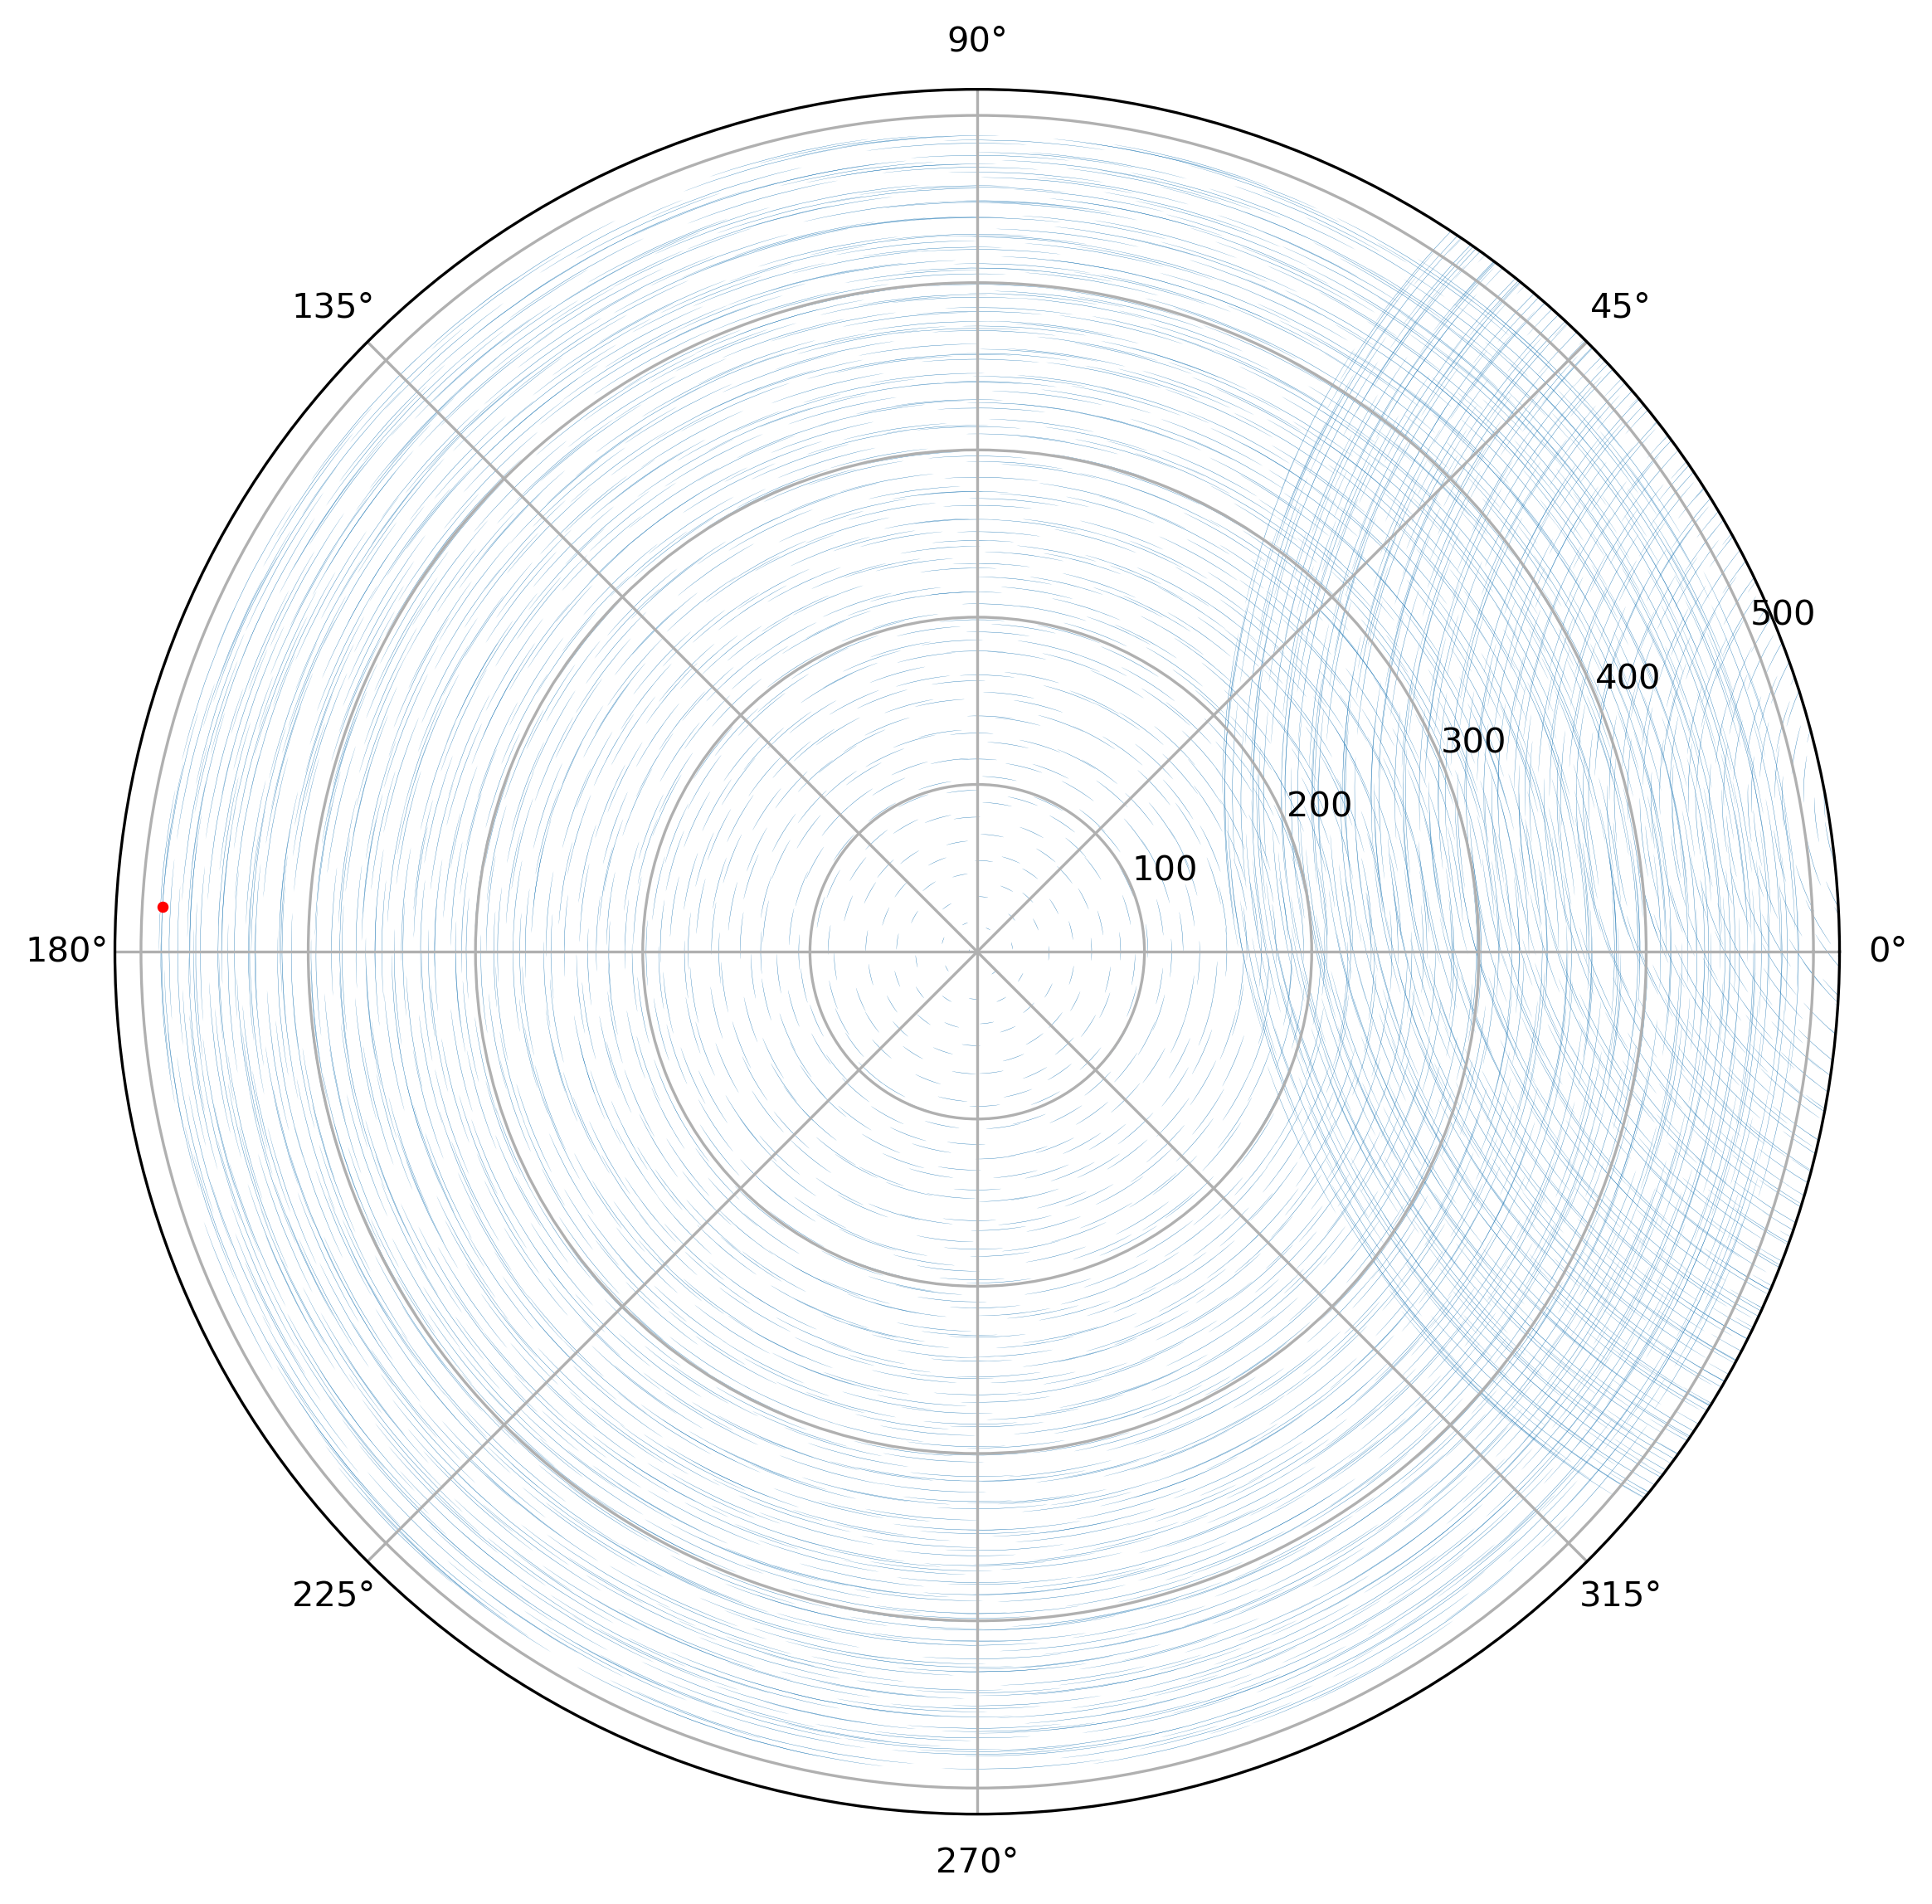

In [21]:
fig = plt.figure(figsize=(16,9), dpi=300) 
axes= fig.add_subplot(projection = 'polar')
# axes.scatter(t1,r1,s=5)
for i in range(0,len(r1)):
    C.append(mpl.patches.Circle((t1[i],r1[i]),radius,transform = axes.transData))
C1 = np.asarray(C)
for i in C1:
    axes.add_patch(i)
axes.scatter(t1[0],r1[0],s=5,color ='r')
r1[0],t1[0]

In [61]:
C1[0]

In [47]:
xt = []
yt = []
for i in indices:
    xt.append(s1x[i])
    yt.append(s1y[i])
xt = np.asarray(xt)
yt = np.asarray(yt)
radius = 0.1
# C/ = np.zeros(len(r1))
C = []
xl1 = max(xt)+10
xl2 = min(xt)-10
yl1 = max(yt)+10
yl2 = min(yt)-10
radius = 3

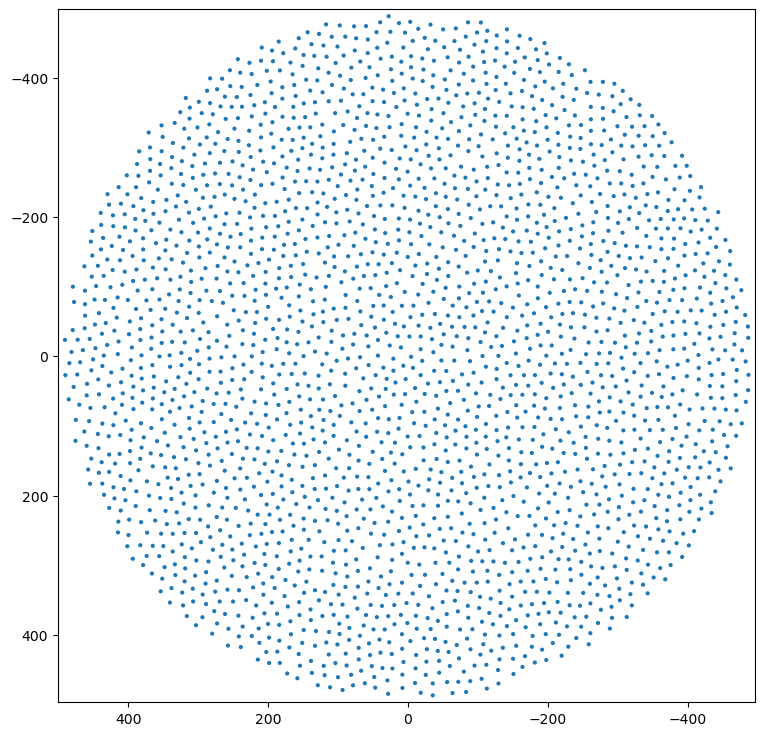

In [48]:
fig1, axes1= plt.subplots(1,1,figsize=(9,9))
# axes1.scatter(xt,yt,s=5)
axes1.set_xlim([xl1,xl2])
axes1.set_ylim([yl1,yl2])
for i in range(0,len(r1)):
    C.append(mpl.patches.Circle((xt[i],yt[i]),radius,transform = axes1.transData))
C1 = np.asarray(C)
for i in C1:
    axes1.add_patch(i)
# axes.scatter(frame1x,frame1y,s=5)
# axes1.scatter(s1x[0],s1y[0],s=5,color ='r')